In [1]:
#调库 析晶程序判别
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#初步读取和处理文本
file_path = r'C:\Users\zhang\Desktop\p3000-fix.xyz'
with open(file_path) as f:
    str_data = f.read()
data = str_data.split()

In [3]:
#定义数值
#定义最大的附近原子数
max_neigh = 6
max_dis = 2.4

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
@Time     : 2021/8/10 9:16
@Author   : Allen Pen(Haijun Peng)
@E-mail   : shengyutou@outlook.com
NOTE:
"""
import math


def fun_angle(point_a, point_b, point_c):
    """
    根据三点坐标计算夹角

                  点a
           点b ∠
                   点c

    :param point_a、point_b、point_c: 数据类型为list,二维坐标形式[x、y]或三维坐标形式[x、y、z]
    :return: 返回角点b的夹角值


    数学原理：
    设m,n是两个不为0的向量，它们的夹角为<m,n> (或用α ,β, θ ,..,字母表示)

    1、由向量公式：cos<m,n>=m.n/|m||n|

    2、若向量用坐标表示，m=(x1,y1,z1), n=(x2,y2,z2),

    则,m.n=(x1x2+y1y2+z1z2).

    |m|=√(x1^2+y1^2+z1^2), |n|=√(x2^2+y2^2+z2^2).

    将这些代入②得到：

    cos<m,n>=(x1x2+y1y2+z1z2)/[√(x1^2+y1^2+z1^2)*√(x2^2+y2^2+z2^2)]

    上述公式是以空间三维坐标给出的，令坐标中的z=0,则得平面向量的计算公式。

    两个向量夹角的取值范围是：[0,π].

    夹角为锐角时，cosθ>0；夹角为钝角时,cosθ<0.

    """
    a_x, b_x, c_x = point_a[0], point_b[0], point_c[0]  # 点a、b、c的x坐标
    a_y, b_y, c_y = point_a[1], point_b[1], point_c[1]  # 点a、b、c的y坐标

    if len(point_a) == len(point_b) == len(point_c) == 3:
        # print("坐标点为3维坐标形式")
        a_z, b_z, c_z = point_a[2], point_b[2], point_c[2]  # 点a、b、c的z坐标
    else:
        a_z, b_z, c_z = 0,0,0  # 坐标点为2维坐标形式，z 坐标默认值设为0
        # print("坐标点为2维坐标形式，z 坐标默认值设为0")

    # 向量 m=(x1,y1,z1), n=(x2,y2,z2)
    x1,y1,z1 = (a_x-b_x),(a_y-b_y),(a_z-b_z)
    x2,y2,z2 = (c_x-b_x),(c_y-b_y),(c_z-b_z)

    # 两个向量的夹角，即角点b的夹角余弦值
    cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2))) # 角点b的夹角余弦值
    B = math.degrees(math.acos(cos_b)) # 角点b的夹角值
    return B

In [5]:
class point:
    def __init__(self,name,x,y,z):
        #自身坐标
        self.x=x
        self.y=y
        self.z=z
        self.name=name
        self.cry=0
        #记录最近的几个点 每个点按顺序记录下xyz和dis 
        self.neighbor_atom=[]
        #记录与最近的几个点的角度 
        self.angle=[]
    
    #定义类中的替换函数  如果这个距离比原有的小，就替换掉原有点的记录
    def show(self):
        print("name: ",self.name," xyz: ",self.x," ",self.y," " ,self.z)
        print("neighbor: ")
        for i in self.neighbor_atom:
            print(i)
        print("angle: ")
        for i in self.angle:
            print(i)
            
    def sub(self,x,y,z,dis):
        
        #为空的话直接放进去
        if(len(self.neighbor_atom)==0):
            self.neighbor_atom.append([x,y,z,dis])
            return
        #大多数点是比表中最大的点距离大的 所以大的直接返回
        if(dis>6):
            return
        #如果需要调整,那么先插入表尾，再排序，再删除最后一个节点就行
        else:
            self.neighbor_atom.append([x,y,z,dis])
            self.neighbor_atom.sort(key=lambda xx:xx[-1])
            #如果表满了则删除最后一个
            if(len(self.neighbor_atom)>max_neigh):
                del self.neighbor_atom[-1]
    
    def filter_neighbor(self,max_d):
        self.neighbor_atom.sort(key=lambda xx:xx[-1])
        for i in range(len(self.neighbor_atom)-1,-1,-1):
            if(self.neighbor_atom[-1][-1]>max_d):
                self.neighbor_atom.pop()
    
    #计算以中心点为顶点，距离最近的任意两点为边的角的角度值
#     def cal_angle(self):
#         for i in range(len(self.neighbor_atom)):
#             for j in range(i+1,len(self.neighbor_atom)):
#                 #此时便有了point nei[i] nei[j]三个点
#                 #定义两个空间向量
#                 x1,y1,z1 = (self.neighbor_atom[i][0]-self.x),(self.neighbor_atom[i][1]-self.y),(self.neighbor_atom[i][2]-self.z)
#                 x2,y2,z2 = (self.neighbor_atom[j][0]-self.x),(self.neighbor_atom[j][1]-self.y),(self.neighbor_atom[j][2]-self.z)
#                 #两个向量的夹角
#                 cos_b = (x1*x2 + y1*y2 + z1*z2) / (math.sqrt(x1**2 + y1**2 + z1**2) *(math.sqrt(x2**2 + y2**2 + z2**2)))
#                 B = math.degrees(math.cos(cos_b)) 
#                 self.angle.append(B)
    def cal_angle(self):
        self.angle.clear()
        for i in range(len(self.neighbor_atom)):
            for j in range(i+1,len(self.neighbor_atom)):
                a = [self.neighbor_atom[i][0], self.neighbor_atom[i][1], self.neighbor_atom[i][2]]
                
                b = [self.x, self.y, self.z]
                
                c=[self.neighbor_atom[j][0], self.neighbor_atom[j][1], self.neighbor_atom[j][2]]
                
                temp = fun_angle(a,b,c)
                self.angle.append(temp)
        self.angle.sort()
    #最后还应该有一个判断是不是晶体的程序
    def judge_cry(self):
        pass

In [17]:
#此处取出第一帧进行分析
atoms_num = int(data[0])
frame_len = atoms_num+2
data_len =len(data)
n = data_len//frame_len

temp=data[:2+atoms_num*4]
#暂时先自行处理了表头
temp=temp[2:]

In [18]:
data_list = []
for i in range(atoms_num):
    data_list.append([temp[i*4+0],float(temp[i*4+1]),float(temp[i*4+2]),float(temp[i*4+3])])

In [19]:
#定义距离函数
def cal_distance(x1,y1,z1,x2,y2,z2):
    dis = ((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)**(1/2)
    return dis

In [20]:
#记录class点的列表
o_point = []
nb_point = []
li_point = []

for i in data_list:
    if(i[0]=='Nb'):
        nb_point.append(point(i[0],i[1],i[2],i[3]))
    if(i[0]=='O'):
        o_point.append([i[1],i[2],i[3]])
    if(i[0]=='Li'):
        li_point.append([i[1],i[2],i[3]])

In [21]:
#对所有的点进行排列组合 找到距离最近的六个点的位置放入表中

# for i in nb_point:
#     for j in o_point:
        
#         if(abs(i.x-j[0])>3 or abs(i.y-j[1])>3 or abs(i.z-j[2])>3):
#             continue
#         dis = cal_distance(i.x, i.y, i.z, j[0], j[1], j[2])
#         #通过计算各个点的距离  如果距离小了就放入列表中
#         i.sub(j[0], j[1], j[2], dis)

for i in range(len(nb_point)):
    for j in range(i+1,len(nb_point)):
        #大多数点的距离太原直接不用计算
        if(abs(nb_point[i].x-nb_point[j].x)>5 or abs(nb_point[i].y-nb_point[j].y)>5 or abs(nb_point[i].z-nb_point[j].z)>5):
            continue
        dis = cal_distance(nb_point[i].x,nb_point[i].y,nb_point[i].z,nb_point[j].x,nb_point[j].y,nb_point[j].z)
        nb_point[i].sub(nb_point[j].x, nb_point[j].y, nb_point[j].z, dis)
        nb_point[j].sub(nb_point[i].x, nb_point[i].y, nb_point[i].z, dis)

In [22]:
#再计算各自的角度
for i in nb_point:
    i.cal_angle()

In [23]:
for i in nb_point[:10]:
    i.show()

name:  Nb  xyz:  47.0994   6.80739   33.8839
neighbor: 
[45.7094, 5.80548, 30.5369, 3.7600974253468467]
[48.4162, 4.85013, 36.9296, 3.852417090295393]
[50.8179, 7.58692, 33.1238, 3.8746175657605204]
[43.3752, 5.0173, 33.8754, 4.132089071898139]
[44.1591, 8.84845, 31.7939, 4.144802771375255]
[47.9201, 8.29345, 38.3085, 4.739093581435172]
angle: 
50.35653300746139
54.55817385041493
63.22773399141493
64.71804996667964
85.94416032502657
87.3559583638347
95.14039024800061
103.51871784817381
107.0884859741084
116.05397597900226
118.86961644770551
134.0047455572552
153.03978674340934
162.12478480491586
168.1361073250657
name:  Nb  xyz:  10.567   6.48451   33.0977
neighbor: 
[8.17686, 4.36394, 34.451, 3.4700154516226576]
[9.45897, 3.31613, 31.572, 3.6870208563690023]
[8.65285, 8.43796, 30.5893, 3.7110655727162793]
[10.9766, 6.70202, 37.068, 3.9972946914256844]
[6.72077, 7.59046, 33.9664, 4.09527170104744]
[14.2676, 4.50257, 32.7213, 4.214760192893541]
angle: 
55.1963559173459
55.62519225115282

In [ ]:
#现在有了各个点的数据和角度，那么怎么判断是不是晶体呢？
#可以画图来看看~ 分别画出总体的角度分布 以及晶体区域的角度分布
#画一下晶体区域的角度

#调整neighbor_dis 
max_dis=5
for i in nb_point:
    i.filter_neighbor(max_dis)

list_cry= []
for i in nb_point:
    if(i.x>0 and i.x<120):
        list_cry.append(i)

y=[]
x=[]
for i in list_cry:
    for j in i.angle:
        y.append(j)
        x.append(i.x)

plt.figure(figsize=(10,8))
plt.scatter(x,y)

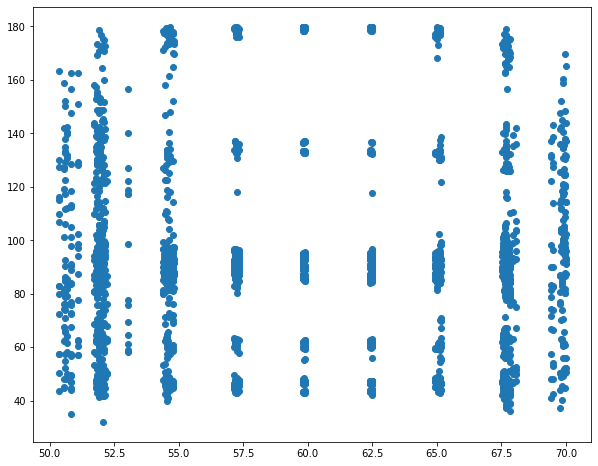

In [30]:
list_cry=[]
for i in nb_point:
    if(i.x>50 and i.x<70):
        list_cry.append(i)

y=[]
x=[]
for i in list_cry:
    for j in i.angle:
        y.append(j)
        x.append(i.x)

plt.figure(figsize=(10,8))
plt.scatter(x,y)

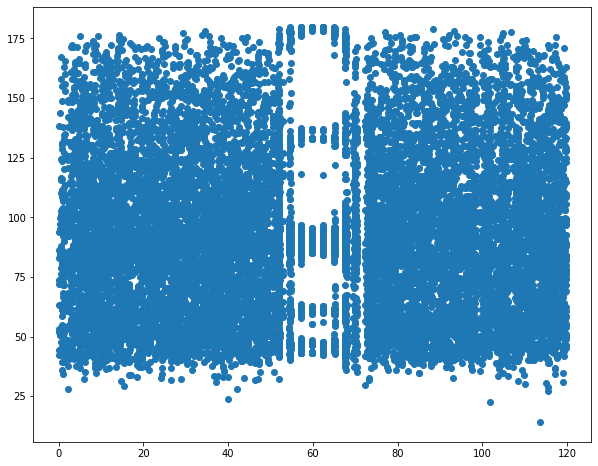

In [28]:
list_all=[]
for i in nb_point:
    if(i.x>0 and i.x<120):
        list_all.append(i)

y=[]
x=[]
for i in list_all:
    for j in i.angle:
        y.append(j)
        x.append(i.x)

plt.figure(figsize=(10,8))
plt.scatter(x,y)

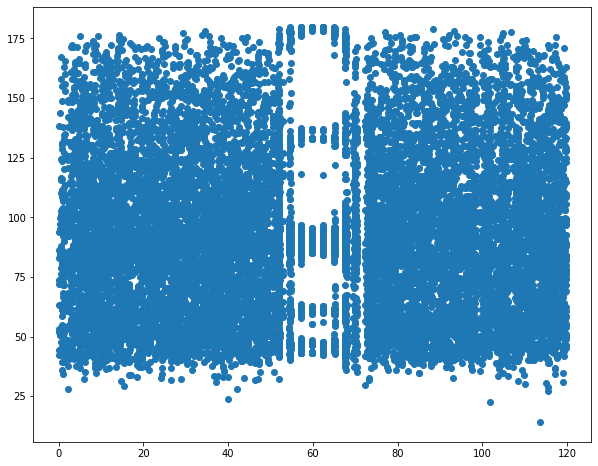

In [29]:
##看角度分布
list_all=[]
for i in nb_point:
    if(i.x>0 and i.x<120):
        list_all.append(i)
    
for i in list_all:
    i.filter_neighbor(4.4)
    
y=[]
x=[]
for i in list_all:
    for j in i.angle:
        y.append(j)
        x.append(i.x)

plt.figure(figsize=(10,8))
plt.scatter(x,y)

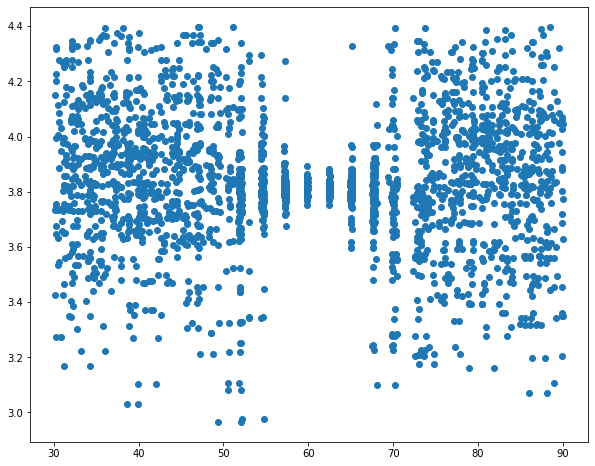

In [32]:
#来个角度Nb-Nb距离分布

list_all=[]
for i in nb_point:
    if(i.x>30 and i.x<90):
        list_all.append(i)
    
# for i in list_all:
#     i.filter_neighbor(10)
    
y=[]
x=[]
for i in list_all:
    for j in i.neighbor_atom:
        y.append(j[-1])
        x.append(i.x)

plt.figure(figsize=(10,8))
plt.scatter(x,y)